In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
pd.options.display.max_columns = None

### Importing Data

In [3]:
raw_data = pd.read_csv("F:\\Learning\\Bsc.IT(Hon)\\Semester 8\\ML\\Lab\\Hotel Prediction\\Hotel Data\\H1.csv")
df = raw_data.copy()

In [4]:
df

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NULL,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NULL,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NULL,NULL,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,NULL,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,NULL,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,0,212,2017,August,35,31,2,8,2,1,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,143,NULL,0,Transient,89.75,0,0,Check-Out,2017-09-10
40056,0,169,2017,August,35,30,2,9,2,0,0,BB,IRL,Direct,Direct,0,0,0,E,E,0,No Deposit,250,NULL,0,Transient-Party,202.27,0,1,Check-Out,2017-09-10
40057,0,204,2017,August,35,29,4,10,2,0,0,BB,IRL,Direct,Direct,0,0,0,E,E,0,No Deposit,250,NULL,0,Transient,153.57,0,3,Check-Out,2017-09-12
40058,0,211,2017,August,35,31,4,10,2,0,0,HB,GBR,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,40,NULL,0,Contract,112.80,0,1,Check-Out,2017-09-14


In [5]:
df.columns

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'Agent', 'Company',
       'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate'],
      dtype='object')

In [6]:
df.ReservedRoomType.value_counts()

A                   23399
D                    7433
E                    4982
G                    1610
F                    1106
C                     918
H                     601
L                       6
B                       3
P                       2
Name: ReservedRoomType, dtype: int64

In [7]:
df.AssignedRoomType.value_counts()

A                   17046
D                   10339
E                    5638
C                    2214
G                    1853
F                    1733
H                     712
I                     363
B                     159
P                       2
L                       1
Name: AssignedRoomType, dtype: int64

### Ordering Months

In [8]:
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
df['ArrivalDateMonth'] = pd.Categorical(df['ArrivalDateMonth'], categories=months, ordered=True)

### Customer segmentation freq bar graph

In [9]:
p_table = df.pivot_table( index = ['MarketSegment'], aggfunc='count', values='ADR' )
p_table

,ADR
MarketSegment,
Complementary,201
Corporate,2309
Direct,6513
Groups,5836
Offline TA/TO,7472
Online TA,17729


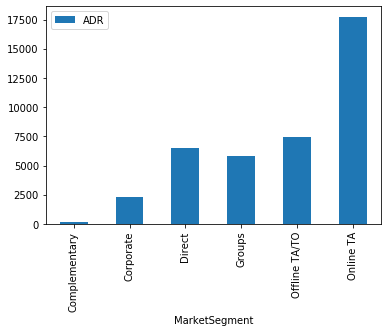

In [10]:
p_table.plot(kind='bar')

### Customer Segmentation vs CustomerType

In [11]:
p_table_CustomerType = df.pivot_table( index = ['CustomerType'], aggfunc='count', values='ADR', columns=['MarketSegment']) #, columns=['CustomerType'] 
p_table_CustomerType

MarketSegment,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA
CustomerType,,,,,,
Contract,1,22,12,34,1706,1
Group,1,13,82,12,92,84
Transient,187,1621,5876,1615,4715,16195
Transient-Party,12,653,543,4175,959,1449


In [12]:
ls = p_table_CustomerType.columns.array

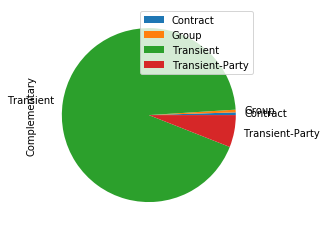

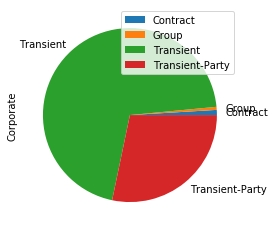

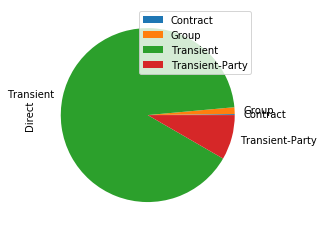

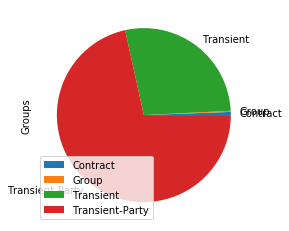

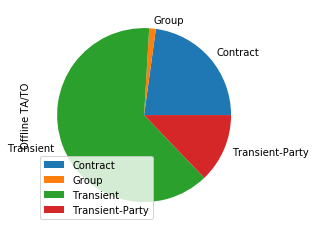

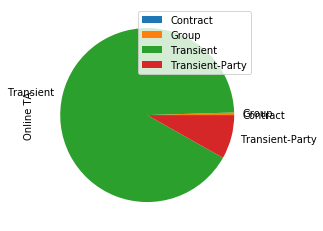

In [13]:
for col in ls:
    p_table_CustomerType.plot(kind='pie', y=col)

### Customer Segmentation vs Customer Distribution

In [14]:
p_table_CustomerType = df.pivot_table( index = ['DistributionChannel'], aggfunc='count', values='ADR', columns=['MarketSegment']) #, columns=['CustomerType'] 
p_table_CustomerType

MarketSegment,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA
DistributionChannel,,,,,,
Corporate,20.0,2152.0,84.0,988.0,14.0,11.0
Direct,139.0,116.0,6228.0,1295.0,10.0,77.0
TA/TO,42.0,41.0,200.0,3553.0,7448.0,17641.0
Undefined,NaN,NaN,1.0,NaN,NaN,NaN


In [15]:
ls = p_table_CustomerType.columns.array

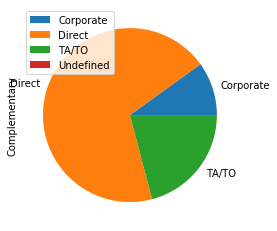

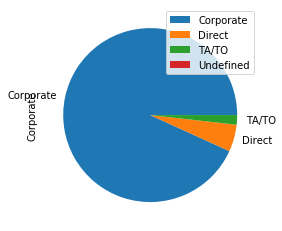

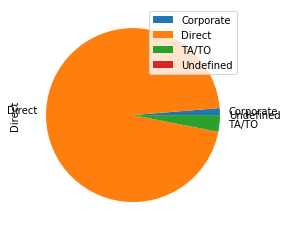

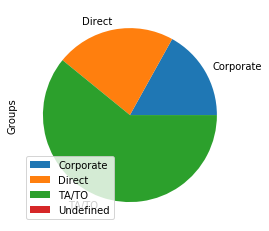

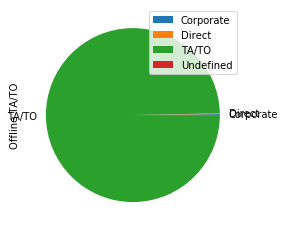

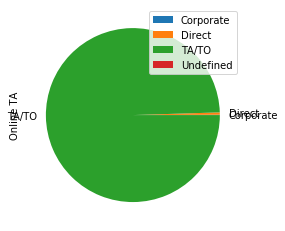

In [16]:
for col in ls:
    p_table_CustomerType.plot(kind='pie', y=col)

### Customer Segmentation vs Country

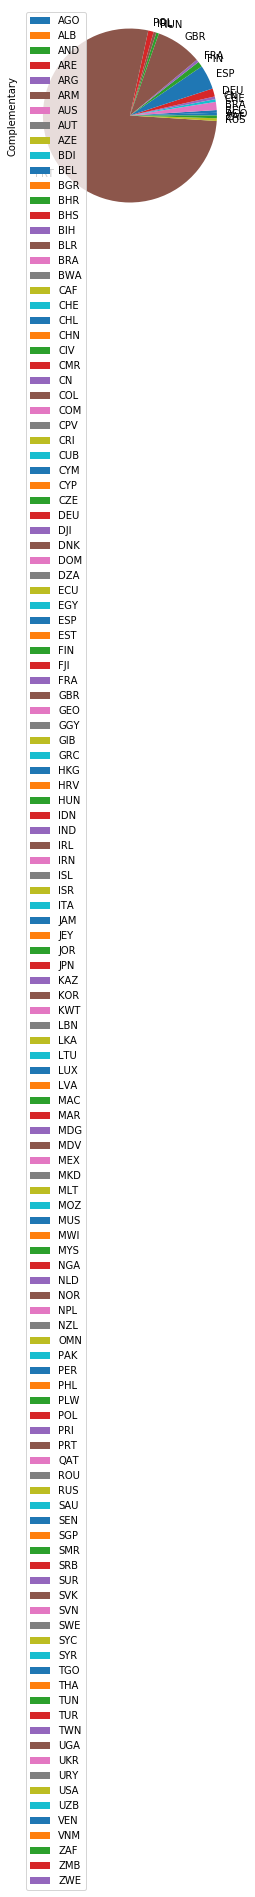

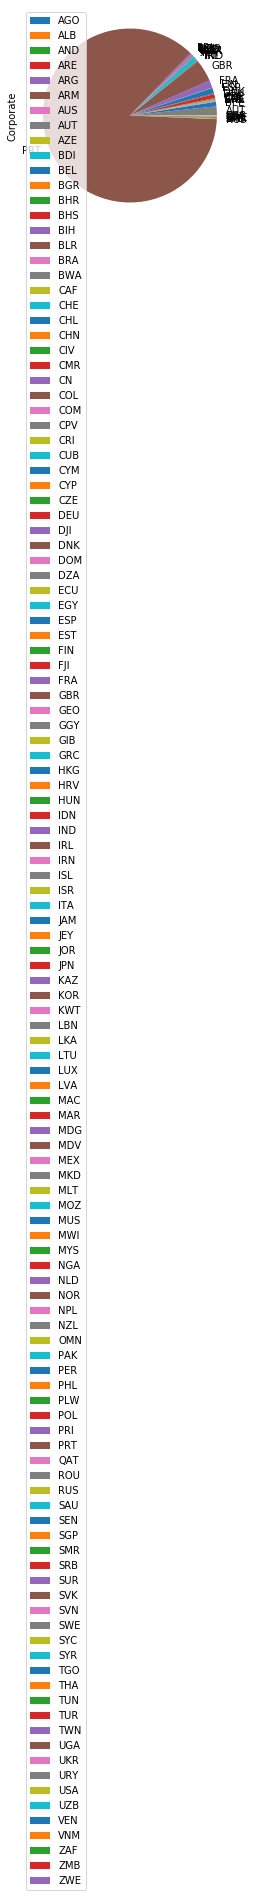

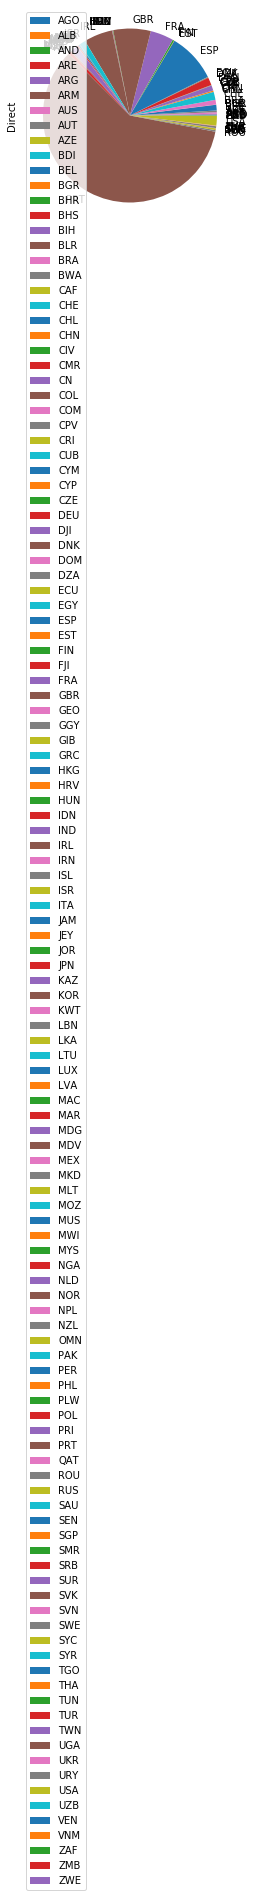

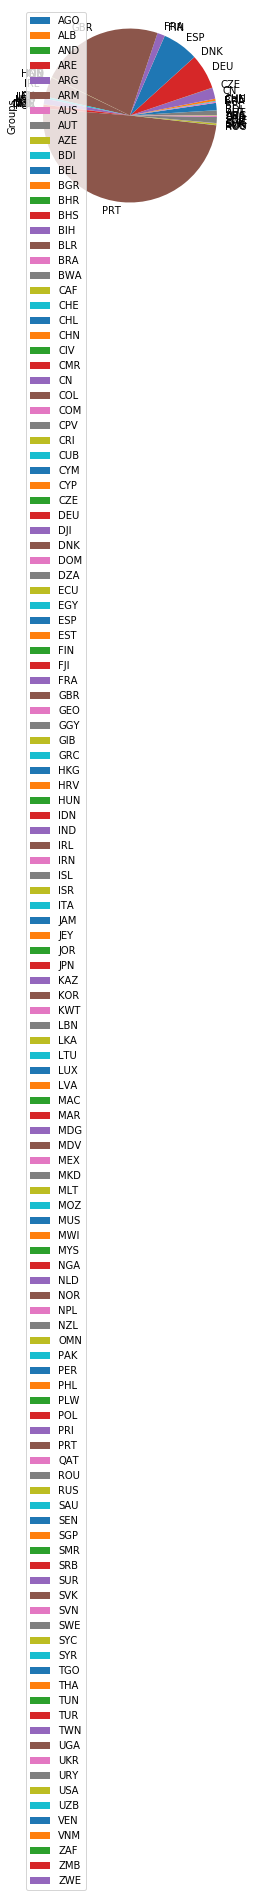

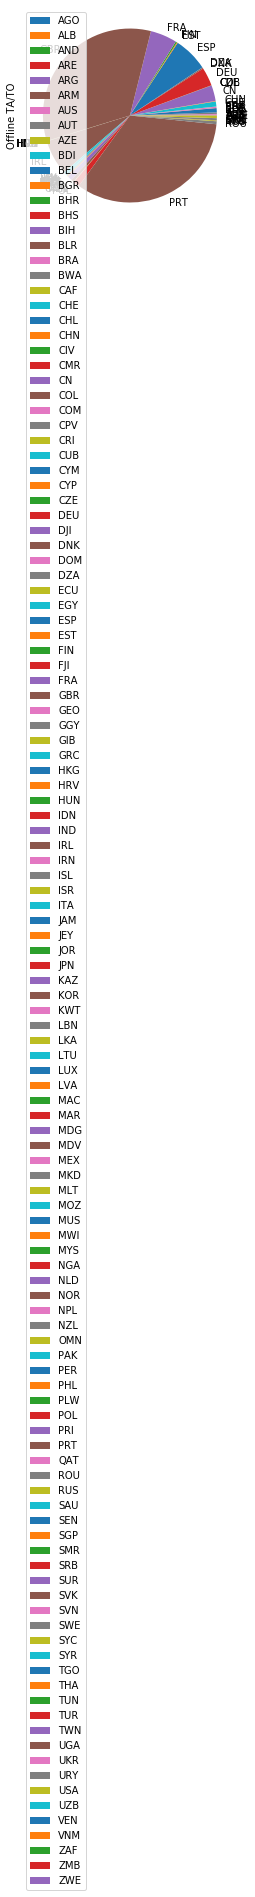

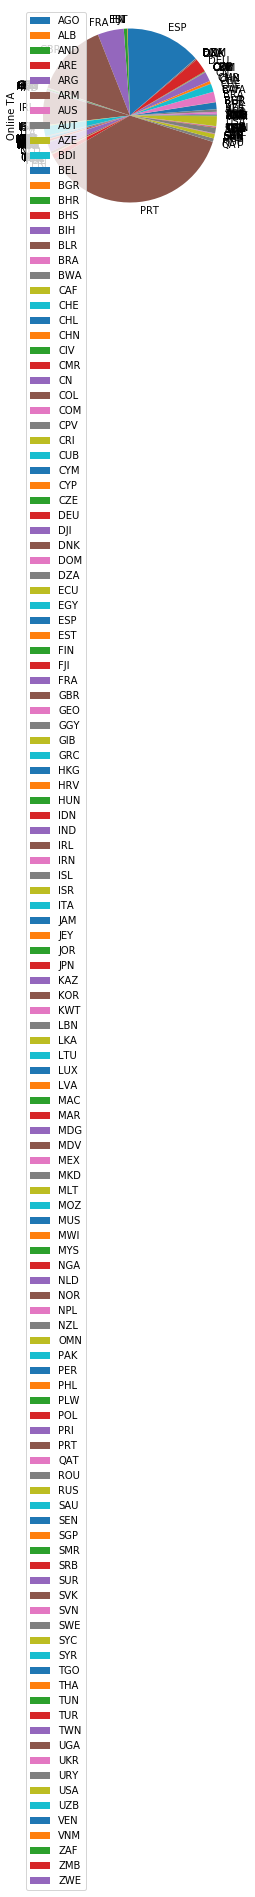

In [32]:
p_table_CustomerType = df.pivot_table( index = ['Country'], aggfunc='count', values='ADR', columns=['MarketSegment']) #, columns=['CustomerType'] 

ls3 = p_table_CustomerType.columns.array

for col in ls3:
    p_table_CustomerType.plot(kind='pie', y=col)

### Room Type Freq

In [17]:
p_table_roomType = df.pivot_table( index = ['AssignedRoomType'], aggfunc='count', values='ADR' )
p_table_roomType

,ADR
AssignedRoomType,
A,17046
B,159
C,2214
D,10339
E,5638
F,1733
G,1853
H,712
I,363


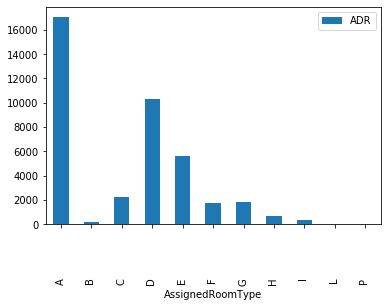

In [18]:
p_table_roomType.plot(kind='bar')

### Room Type vs Check in Month

In [19]:
p_table_roomType2 = df.pivot_table( index = ['ArrivalDateMonth'], aggfunc='count', values='ADR', columns=['AssignedRoomType']) #, columns=['CustomerType'] 
p_table_roomType2

AssignedRoomType,A,B,C,D,E,F,G,H,I,L,P
ArrivalDateMonth,,,,,,,,,,,
January,768.0,3.0,57.0,839.0,299.0,93.0,84.0,28.0,22.0,NaN,NaN
February,1353.0,3.0,129.0,971.0,377.0,105.0,105.0,36.0,23.0,NaN,1.0
March,1424.0,11.0,165.0,955.0,439.0,146.0,126.0,34.0,36.0,NaN,NaN
April,1491.0,12.0,207.0,946.0,587.0,137.0,147.0,47.0,35.0,NaN,NaN
May,1546.0,21.0,204.0,798.0,546.0,160.0,169.0,64.0,51.0,NaN,NaN
June,1419.0,21.0,208.0,584.0,384.0,146.0,181.0,74.0,28.0,NaN,NaN
July,1778.0,22.0,329.0,1062.0,713.0,222.0,289.0,115.0,42.0,1.0,NaN
August,1953.0,35.0,334.0,1160.0,716.0,249.0,289.0,124.0,34.0,NaN,NaN
September,1445.0,14.0,227.0,597.0,426.0,155.0,160.0,63.0,21.0,NaN,NaN


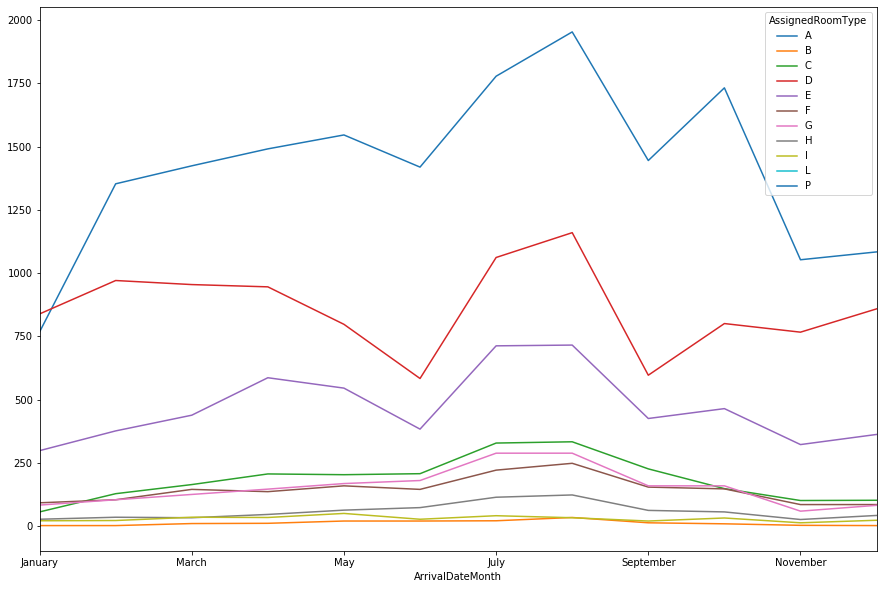

In [20]:
p_table_roomType2.plot(figsize=(15,10))

### CustomerSegment vs Check in Month

In [21]:
p_table_customerSegment2 = df.pivot_table( index = ['ArrivalDateMonth'], aggfunc='count', values='ADR', columns=['MarketSegment']) #, columns=['CustomerType'] 
p_table_customerSegment2

MarketSegment,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA
ArrivalDateMonth,,,,,,
January,16,191,522,227,264,973
February,18,304,620,510,453,1198
March,17,269,526,784,558,1182
April,20,230,496,988,491,1384
May,16,161,399,734,752,1497
June,12,137,451,142,760,1543
July,12,109,872,63,936,2581
August,5,40,961,22,936,2930
September,4,89,415,610,885,1105


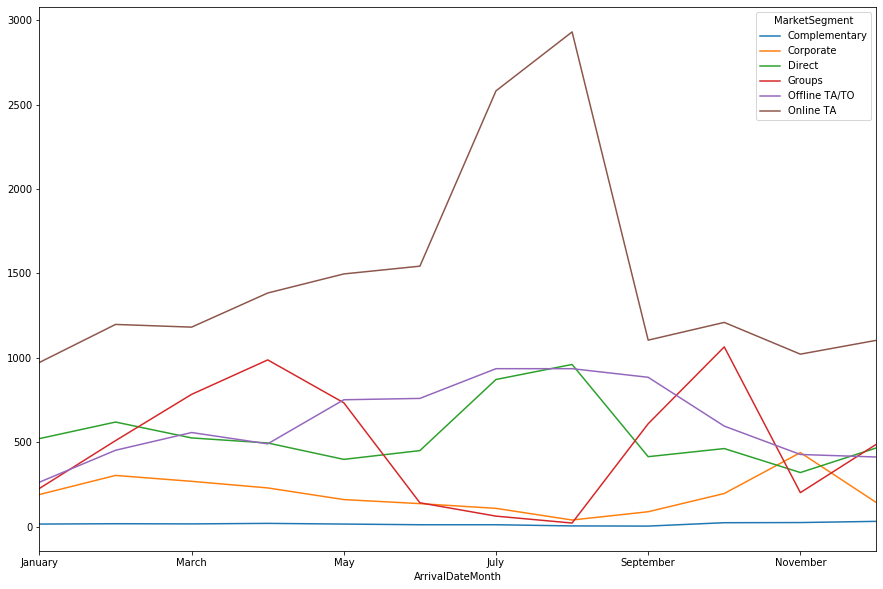

In [22]:
# sns.set(rc={'figure.figsize':(17, 10)})
p_table_customerSegment2.plot(figsize=(15,10))

### (RoomType + CustomerSegment) vs CheckinMonth

In [23]:
p_table_RT_CS = df.pivot_table( index = ['ArrivalDateMonth'], aggfunc='count', values='ADR', columns=['MarketSegment', 'AssignedRoomType']) #, columns=['CustomerType'] 
p_table_RT_CS

MarketSegment       Complementary                                    \
AssignedRoomType A                C                D                  
ArrivalDateMonth                                                      
January                       NaN              NaN              6.0   
February                      3.0              1.0              2.0   
March                         7.0              2.0              5.0   
April                         2.0              1.0             10.0   
May                           3.0              4.0              1.0   
June                          2.0              4.0              3.0   
July                          4.0              NaN              2.0   
August                        2.0              NaN              NaN   
September                     2.0              NaN              NaN   
October                       3.0              3.0              4.0   
November                      4.0              3.0             10.0   
December                      6.0              2.0             14.0   

MarketSegment                                                        \
AssignedRoomType E                F                G                  
ArrivalDateMonth                                                      
January                       1.0              8.0              1.0   
February                      5.0              3.0              2.0   
March                         2.0              NaN              1.0   
April                         1.0              5.0              NaN   
May                           3.0              1.0              3.0   
June                          1.0              1.0              1.0   
July                          1.0              1.0              1.0   
August                        3.0              NaN              NaN   
September                     NaN              1.0              NaN   
October                       6.0              3.0              3.0   
November                      2.0              5.0              1.0   
December                      7.0              1.0              2.0   

MarketSegment                                             Corporate  \
AssignedRoomType H                I                A                  
ArrivalDateMonth                                                      
January                       NaN              NaN             49.0   
February                      1.0              1.0            138.0   
March                         NaN              NaN            140.0   
April                         1.0              NaN             83.0   
May                           1.0              NaN             82.0   
June                          NaN              NaN             82.0   
July                          1.0              2.0             47.0   
August                        NaN              NaN             12.0   
September                     1.0              NaN             49.0   
October                       NaN              2.0            118.0   
November                      NaN              NaN            205.0   
December                      NaN              NaN             60.0   

MarketSegment                                                        \
AssignedRoomType B                C                D                  
ArrivalDateMonth                                                      
January                       1.0              5.0            113.0   
February                      1.0             10.0            130.0   
March                         2.0              4.0             88.0   
April                         2.0             16.0             72.0   
May                           NaN              8.0             38.0   
June                          3.0              8.0             23.0   
July                          1.0              9.0             28.0   
August                        3.0              1.0              9.0   
September            

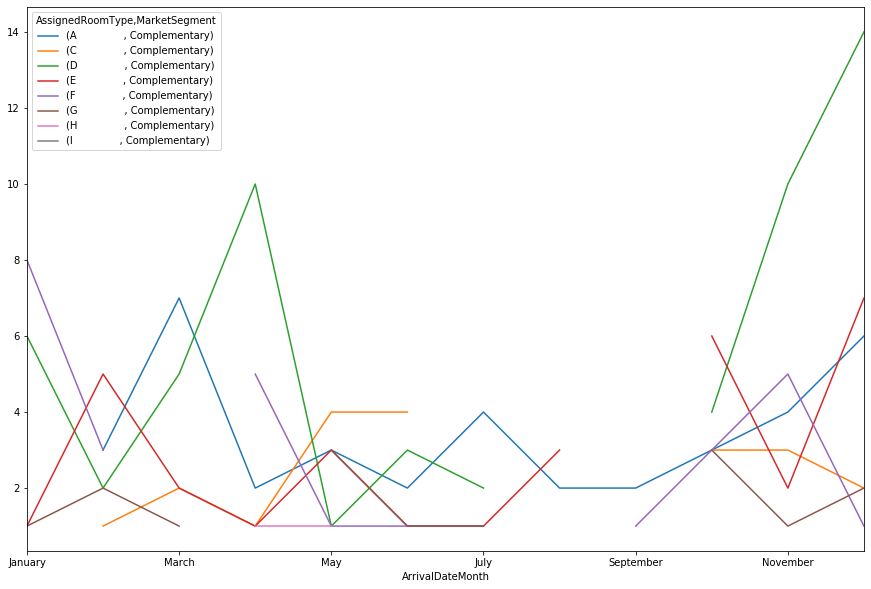

In [24]:
MSeg = 'Complementary'
df_temp = df.loc[df.index[df.MarketSegment == MSeg]]

p_table_RT_CS = df_temp.pivot_table( index = ['ArrivalDateMonth'], aggfunc='count', values='ADR', columns=['AssignedRoomType','MarketSegment']) #, columns=['CustomerType'] 

# sns.set(rc={'figure.figsize':(17, 10)})
p_table_RT_CS.plot(figsize=(15,10))

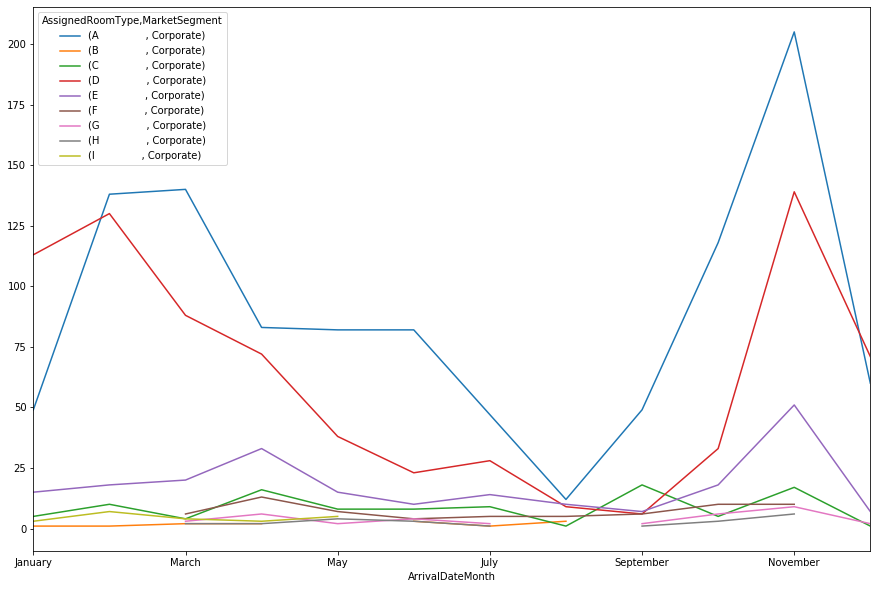

In [25]:
MSeg = ls[1]
df_temp = df.loc[df.index[df.MarketSegment == MSeg]]

p_table_RT_CS = df_temp.pivot_table( index = ['ArrivalDateMonth'], aggfunc='count', values='ADR', columns=['AssignedRoomType','MarketSegment']) #, columns=['CustomerType'] 

# sns.set(rc={'figure.figsize':(17, 10)})
p_table_RT_CS.plot(figsize=(15,10))

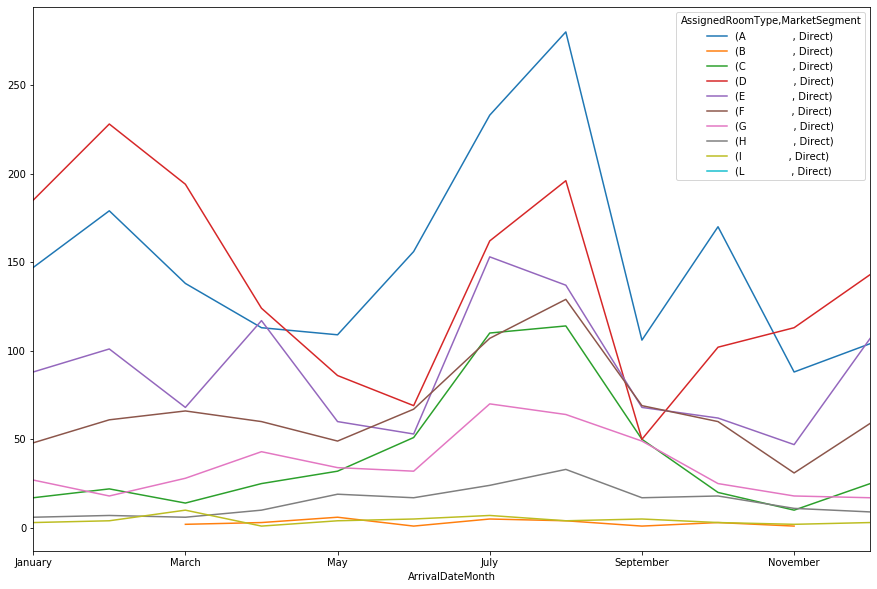

In [26]:
MSeg = ls[2]
df_temp = df.loc[df.index[df.MarketSegment == MSeg]]

p_table_RT_CS = df_temp.pivot_table( index = ['ArrivalDateMonth'], aggfunc='count', values='ADR', columns=['AssignedRoomType','MarketSegment']) #, columns=['CustomerType'] 

# sns.set(rc={'figure.figsize':(17, 10)})
p_table_RT_CS.plot(figsize=(15,10))

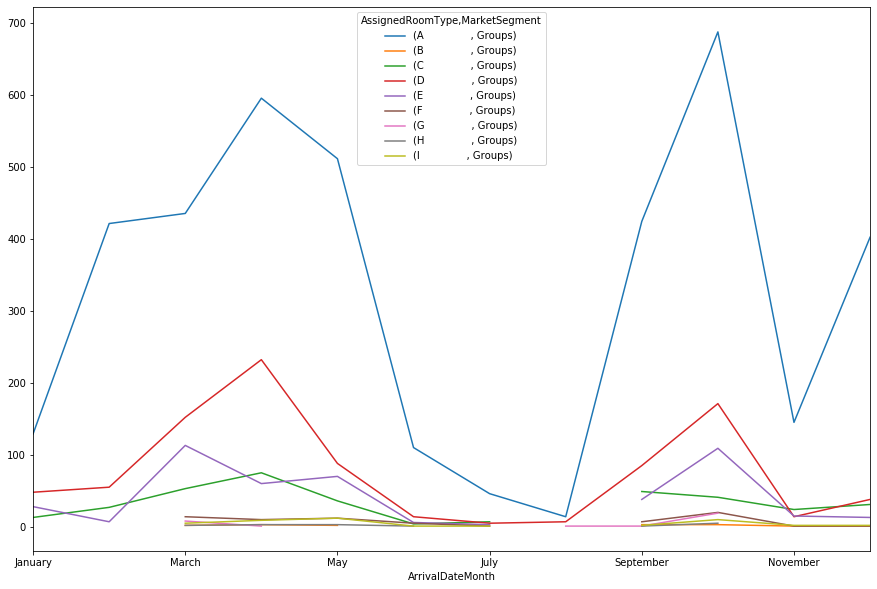

In [27]:
MSeg = ls[3]
df_temp = df.loc[df.index[df.MarketSegment == MSeg]]

p_table_RT_CS = df_temp.pivot_table( index = ['ArrivalDateMonth'], aggfunc='count', values='ADR', columns=['AssignedRoomType','MarketSegment']) #, columns=['CustomerType'] 

# sns.set(rc={'figure.figsize':(17, 10)})
p_table_RT_CS.plot(figsize=(15,10))